In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\dell\Desktop\sentiment_tweets3.csv")

In [5]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
df.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [12]:
df.drop('Index',axis=1,inplace=True)

In [13]:
df

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   message to examine         10314 non-null  object
 1   label (depression result)  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [15]:
df.columns

Index(['message to examine', 'label (depression result)'], dtype='object')

In [27]:
df.head(10)

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, d...",0
7,23 or 24ï¿½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


In [32]:
df = df.sample(frac=1)

In [34]:
df.tail(10)

,message to examine,label (depression result)
8204,Today it doesn't matter what I do. My depressi...,1
4530,@Adgeee13 lauren momberger! she loves harry!,0
2162,Last day of schooooool.,0
3238,@kirstyfionagh Random follower your tweets wh...,0
6658,I want to have a good time!,0
4041,Look at the cute hat I got today...I look scar...,0
3380,Awww lakers &amp; magic. Yayyyy dwight.,0
4764,@KenaSiu Hey thanks!!,0
8315,"Depression is real,cant begin to describe how ...",1
8813,Rappers go thru depression while having everyt...,1


In [35]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

(array([8000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

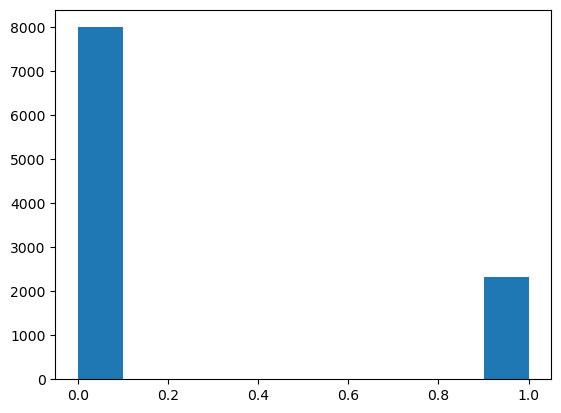

In [17]:
plt.hist(df['label (depression result)'])

# preprocessing

In [36]:
df.head(10)

,message to examine,label (depression result)
0,is excited about getting her new camera,0
1,With the depression came ADHD. This has been h...,1
2,@urbanfantasygrl Read both @katiemacalister 's...,0
3,"Okay, away for a shower now. I'll show you guy...",0
4,@eatnik I'd much prefer to eat australian beef,0
5,The whole drama surrounding @Pabloayodeji tell...,1
6,i been battling a deep ass round of depression...,1
7,My daughter and I were at the park and I actua...,0
8,hooked up to Restaurant City wish i could hav...,0
9,All famous people were people once. Their bein...,0


In [18]:
import re
import string

In [37]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text


df['message to examine']=df['message to examine'].apply(wordopt)

In [38]:
df.head(10)

,message to examine,label (depression result)
0,is excited about getting her new camera,0
1,with the depression came adhd this has been h...,1
2,urbanfantasygrl read both katiemacalister s...,0
3,okay away for a shower now i ll show you guy...,0
4,eatnik i d much prefer to eat australian beef,0
5,the whole drama surrounding pabloayodeji tell...,1
6,i been battling a deep ass round of depression...,1
7,my daughter and i were at the park and i actua...,0
8,hooked up to restaurant city wish i could hav...,0
9,all famous people were people once their bein...,0


# DATA VISUALIZATION

In [39]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud

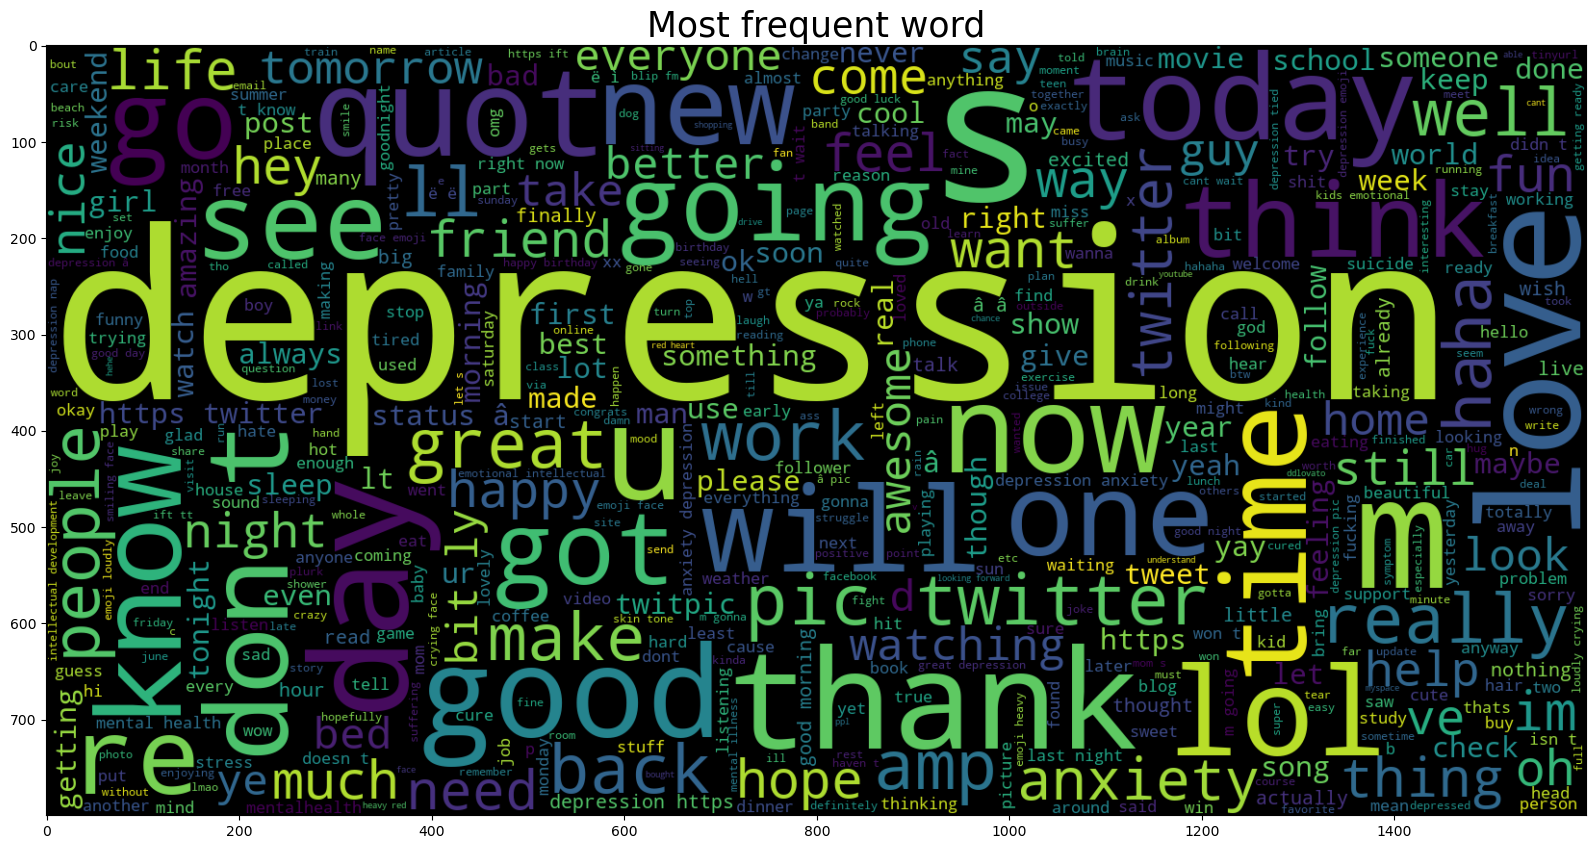

In [53]:
text = ' '.join(word for word in df['message to examine'])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Most frequent word', fontsize=25)
plt.show()

# data splitting

In [54]:
df.head()

,message to examine,label (depression result)
0,is excited about getting her new camera,0
1,with the depression came adhd this has been h...,1
2,urbanfantasygrl read both katiemacalister s...,0
3,okay away for a shower now i ll show you guy...,0
4,eatnik i d much prefer to eat australian beef,0


In [55]:
x = df['message to examine']
y = df['label (depression result)']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [57]:
print(x_test)

2458     adamsconsulting no problem and great   lookin...
5046     realbillbailey last nights gig was awesome   ...
7872    lads it has been a solid while since i ve play...
9384    last night went out to photograph jazz with  q...
5254    my mom stress more about the fact that my room...
                              ...                        
6138    darion could be a sweet dream or a beautiful n...
2956    tried some dresses  getting ready for this cha...
2273      nothing better than seeing your first friends  
4792     perpetualspiral i love pb  amp  banana sandwi...
2045    mmmm good morning tweets  i m taking a persona...
Name: message to examine, Length: 2063, dtype: object


In [58]:
print(x_train)

6244    back in from li  ago n still made it to work  ...
2124     fredwilson my local pub is called the flying ...
3601     dtphulp  lol  me too        you do know that ...
1295     wombtobloom lol  no  i am usually up very lat...
8849    boo lakers  good thing i left on a mini trip u...
                              ...                        
5734     thespybrief  robynforzen you know what they s...
5191                                             s orite 
5390      entroncamento  ya know whos comming here too...
860      epiphanygirl hey doll   can you give  txgirl ...
7270    i m about to listen to don t fight the feelin ...
Name: message to examine, Length: 8251, dtype: object


# NLP

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()

In [60]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [61]:
print(xv_train)

  (0, 9491)	0.18823134692532312
  (0, 17074)	0.32114285784209007
  (0, 16875)	0.2700021098247198
  (0, 15480)	0.12554336837048494
  (0, 7484)	0.15500283275277535
  (0, 9157)	0.3097445054359814
  (0, 14493)	0.2842784324171588
  (0, 249)	0.3817091890587752
  (0, 8693)	0.5265388014774635
  (0, 5627)	0.23177192483940376
  (0, 7206)	0.16828262275702013
  (0, 1072)	0.25886271178829273
  (1, 11545)	0.4235237753394033
  (1, 5423)	0.3895146059582967
  (1, 15176)	0.10994636703493206
  (1, 2140)	0.3230540126344159
  (1, 7455)	0.14190163961191524
  (1, 12107)	0.3895146059582967
  (1, 8900)	0.3895146059582967
  (1, 10236)	0.13977895916470742
  (1, 5575)	0.4575329447205098
  (2, 15803)	0.3481978687534301
  (2, 5304)	0.2524226623772463
  (2, 4863)	0.3481978687534301
  (2, 14131)	0.16601575791948595
  :	:
  (8249, 2179)	0.14812884285787903
  (8249, 15547)	0.2075470450435726
  (8249, 5481)	0.11214305029837161
  (8249, 17164)	0.1013122846656722
  (8249, 15176)	0.1718365631885265
  (8249, 7484)	0.1052534

In [64]:
xv_train.shape

(8251, 17384)

In [65]:
xv_test.shape

(2063, 17384)

# model building

# linear Regression

In [69]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import accuracy_score

In [68]:
LR.fit(xv_train,y_train)
y_predLR= LR.predict(xv_test)

In [70]:
print("th acc of LR is :",accuracy_score(y_test,y_predLR))

th acc of LR is : 0.9907901114881241


# KVM

In [71]:
from sklearn.neighbors import KNeighborsClassifier


In [76]:
metric_k = []
neighbors = np.arange(3,14)

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(xv_train,y_train)
    y_predKNN = KNN.predict(xv_test)
    acc = accuracy_score(y_test,y_predKNN)
    metric_k.append(acc)

In [77]:
print(metric_k)

[0.2569074163839069, 0.2569074163839069, 0.2443044110518662, 0.2443044110518662, 0.23897237033446436, 0.2443044110518662, 0.23606398448860882, 0.24478914202617547, 0.2384876393601551, 0.8051381483276782, 0.7576345128453709]


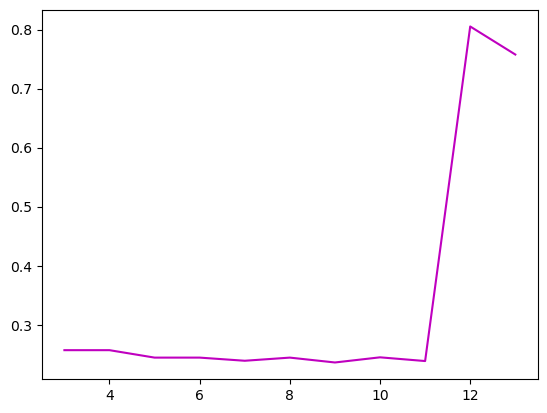

In [80]:
plt.plot(neighbors,metric_k,'m')

In [81]:
# we take as 12

KNN =KNeighborsClassifier(n_neighbors=12)
KNN.fit(xv_train,y_train)
y_predKNN = KNN.predict(xv_test)

In [82]:
print("the acc score of knn is:", accuracy_score(y_test,y_predKNN))

the acc score of knn is: 0.8051381483276782


# SVM

In [83]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')

In [84]:
SVM.fit(xv_train,y_train)
y_predSVM = SVM.predict(xv_test)

In [85]:
print("the acc score of svm is :", accuracy_score(y_test,y_predSVM))

the acc score of svm is : 0.9903053805138148


# DECISION TREE

In [86]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [87]:
DT.fit(xv_train,y_train)
y_predDT = DT.predict(xv_test)

In [88]:
print(" the acc score of dt is:", accuracy_score(y_test,y_predDT))

 the acc score of dt is: 0.9660688317983519


# random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [90]:
RF.fit(xv_train,y_train)
y_predRF = RF.predict(xv_test)

In [92]:
print(" the acc score of RF is:", accuracy_score(y_test,y_predRF))

 the acc score of RF is: 0.9772176442074648


# naive bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [94]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [96]:
NB =[]
for i in [MNB,BNB]:
    i.fit(xv_train,y_train)
    NB.append(accuracy_score(y_test,i.predict(xv_test)))
print(NB)

[0.894813378574891, 0.9636451769268056]


# BOOSTING

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ABC =AdaBoostClassifier()
GBC =GradientBoostingClassifier()


In [98]:
XG =[]
for i in [ABC,GBC]:
    i.fit(xv_train,y_train)
    XG.append(accuracy_score(y_test,i.predict(xv_test)))
print(XG)

[0.9970916141541445, 0.9975763451284537]


In [99]:
%pip install xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

Note: you may need to restart the kernel to use updated packages.


In [100]:
XGB.fit(xv_train,y_train)
y_predXGB = XGB.predict(xv_test)

In [101]:
print("the acc score of XGB is:", accuracy_score(y_test,y_predXGB))

the acc score of XGB is: 0.9970916141541445


# PERFORMANCE ANALYSIS

In [102]:
pt=[]
for i in[LR,RF,DT,KNN,SVM,MNB,BNB,ABC,GBC,XGB]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
print(pt)


[99.08, 97.67, 96.56, 80.56, 99.03, 89.48, 96.36, 99.71, 99.76, 99.71]


# CONCLUSION

from the performance analysis we can say gradientboostingclassifier is high accuracy model

In [110]:
df.tail()

,message to examine,label (depression result)
10309,look at the cute hat i got today i look scar...,0
10310,awww lakers amp magic yayyyy dwight,0
10311,kenasiu hey thanks,0
10312,depression is real cant begin to describe how ...,1
10313,rappers go thru depression while having everyt...,1


In [109]:
example = ["with the depression came adhd this has been"]
example_vectorized = vectorization.transform(example)
result = GBC.predict(example_vectorized)
print(result)

if (result==0):
    print("not depressing")
else:
    print("depressing")

[1]
depressing


In [111]:
example = ["look at the cute hat i got today i look "]
example_vectorized = vectorization.transform(example)
result = GBC.predict(example_vectorized)
print(result)

if (result==0):
    print("not depressing")
else:
    print("depressing")

[0]
not depressing
